In [6]:

! pip install datasets

In [5]:
from google.colab import drive
drive.mount('/content/drive')
!ls

Mounted at /content/drive
drive  sample_data


In [7]:
import pandas as pd
from datasets import load_dataset

# Charger le dataset à partir de la bibliothèque Hugging Face
dataset = load_dataset('allocine')

# Utiliser pandas pour convertir le dataset en DataFrame
data_train = pd.DataFrame(dataset['train'])  # Par exemple, 'train' peut être remplacé par 'test' ou 'validation'
data_test = pd.DataFrame(dataset['test'])
data_validation = pd.DataFrame(dataset['validation'])
# Maintenant, vous pouvez utiliser le DataFrame pandas pour analyser les données
print(data_train.head())

                                              review  label
0  Si vous cherchez du cinéma abrutissant à tous ...      0
1  Trash, re-trash et re-re-trash...! Une horreur...      0
2  Et si, dans les 5 premières minutes du film, l...      0
3  Mon dieu ! Quelle métaphore filée ! Je suis ab...      0
4  Premier film de la saga Kozure Okami, "Le Sabr...      1


In [ ]:
data_train.shape


(160000, 2)

In [ ]:
data_test.shape

(20000, 2)

In [ ]:
data_validation.shape

(20000, 2)

In [ ]:
data_train.head()

,review,label
0,Si vous cherchez du cinéma abrutissant à tous ...,0
1,"Trash, re-trash et re-re-trash...! Une horreur...",0
2,"Et si, dans les 5 premières minutes du film, l...",0
3,Mon dieu ! Quelle métaphore filée ! Je suis ab...,0
4,"Premier film de la saga Kozure Okami, ""Le Sabr...",1


In [ ]:
##################### Preprocessing et Tockenization ##########################################################

In [8]:
import nltk
from nltk.corpus import stopwords

nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

# Tokenizer pour les phrases
tokenizer = nltk.data.load('tokenizers/punkt/french.pickle')

# Stopwords en français
stopwords_fr = stopwords.words("french")


In [9]:
from bs4 import BeautifulSoup
from tqdm.notebook import tqdm
import re

def traitement(text, stopwords=None):
    # supprimer des liens hypertextes
    text = re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", " ", text)
    # supprimer des balises html
    text = BeautifulSoup(text, "lxml").get_text()
    # remplacer les caractères autres que des lettres par des expaces
    text = re.sub("[^a-zA-Z]", " ", text)
    # mettre en minuscules et convertir en liste de mots
    words = text.lower().split()
    # keep only non empty strings
    words = [w for w in words if w]
    if stopwords is not None:
        # supprimer les mots vides de la langue anglaise
        words = [w for w in words if not w in stopwords]
    return(words)

def traitement_final(review, tokenizer=tokenizer, stopwords=None):
    raw_sentences = tokenizer.tokenize(review.strip())
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) != 0:
            sentences.append(traitement(raw_sentence, stopwords))
    return sentences

In [ ]:
# Application des fonctions au dataset

In [ ]:
data_train['review']=data_train['review'].apply(traitement_final)
data_test['review']=data_test['review'].apply(traitement_final)
data_validation['review']=data_validation['review'].apply(traitement_final)

C:\Users\PROBOOK\AppData\Local\Temp\ipykernel_8052\444683764.py:9: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "lxml").get_text()
C:\Users\PROBOOK\AppData\Local\Temp\ipykernel_8052\444683764.py:9: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  text = BeautifulSoup(text, "lxml").get_text()
C:\Users\PROBOOK\AppData\Local\Temp\ipykernel_8052\444683764.py:9: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "lxml").get_text()
C:\Users\PROBOOK\AppData\Local\Temp\ipykernel_8052\444683764.py:9: MarkupResemblesLocatorWarning: The input looks more like a filename tha

In [ ]:
###################### Utilisation de la methode  bag-of-words ########################################



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
#from sklearn import svm
from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
X_train= data_train['review']
X_test = data_test['review']
X_validation = data_validation['review']

y_train = data_train['label']
y_test = data_test['label']
y_validation = data_validation['label']


In [ ]:
# Construction des sacs de mots
data_train['review']=data_train['review'].astype(str)
data_test['review']=data_test['review'].astype(str)
data_validation['review']=data_validation['review'].astype(str)

vectorizer = CountVectorizer()
X_train1 = vectorizer.fit_transform(data_train['review'])
X_test1 = vectorizer.transform(data_test['review'])
X_validation1 = vectorizer.transform(data_validation['review'])



In [ ]:
#print(X_train1)

In [ ]:
#print(X_test1)

In [ ]:
#print(y_train)

In [ ]:
# Utilisation de la regression logistique

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train1, y_train)
y_pred_logistic = logistic_model.predict(X_test1)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Précision du modèle de régression logistique:", accuracy_logistic)

Précision du modèle de régression logistique: 0.9211


C:\Users\PROBOOK\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


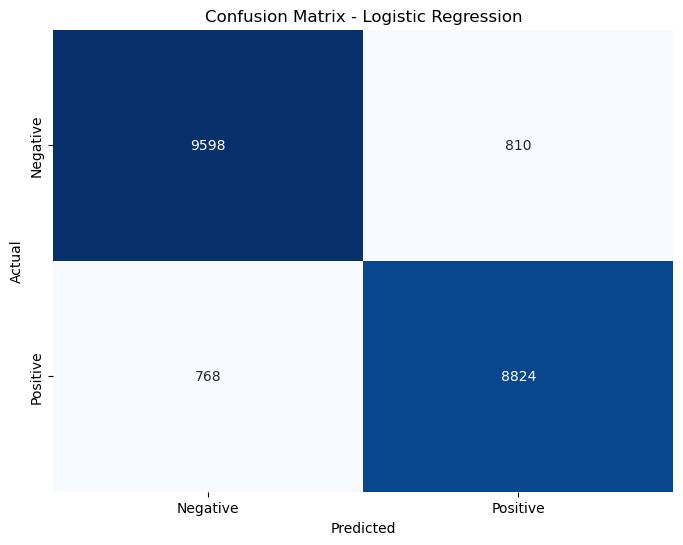

In [ ]:
# Matrice de confusion pour la régression logistique
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logistic, annot=True, cmap="Blues", fmt='d', cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [ ]:
# prediction avec le modèle modèle Naive Bayes

In [ ]:
nb_model = MultinomialNB()
nb_model.fit(X_train1,y_train)
y_pred_nb_model = nb_model.predict(X_test1)
accuracy_nb_model = accuracy_score(y_test, y_pred_nb_model)
print("Précision du modèle Naive Bayes:", accuracy_nb_model)


Précision du modèle Naive Bayes: 0.8943


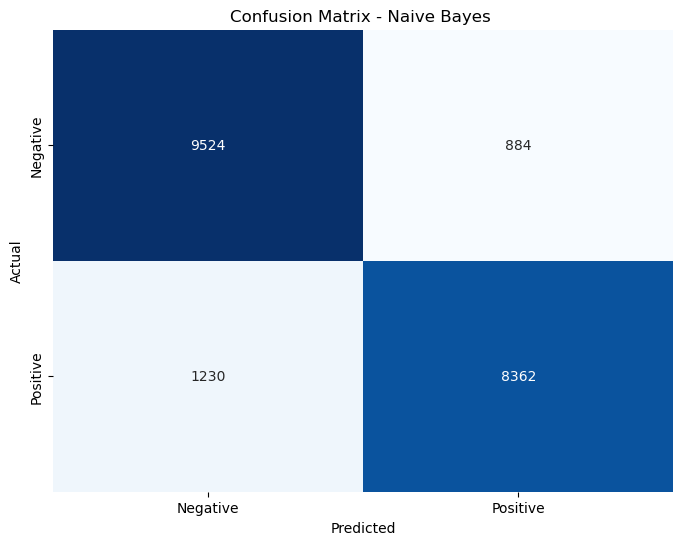

In [ ]:
# Matrice de confusion pour le modèle Naives Bayes
conf_matrix_nb_model = confusion_matrix(y_test, y_pred_nb_model)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb_model, annot=True, cmap="Blues", fmt='d', cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes ')
plt.show()

In [ ]:
################################################## Utilisation de la methode  TF-IDF ##################################

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Vectorisation des textes avec TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Nous utilisons TfidfVectorizer pour convertir les critiques de films en vecteurs de caractéristiques TF-IDF.
                                                       # max_features=5000 limite le nombre maximum de caractéristiques à 5000, ce qui réduit la dimensionnalité des données.

X_train_tfidf = tfidf_vectorizer.fit_transform(data_train['review'])
X_test_tfidf = tfidf_vectorizer.transform(data_test['review'])


In [ ]:
# prediction avec logisticRegression

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_tfidf, y_train)
y_pred_logistic = logistic_model.predict(X_test_tfidf)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Précision du modèle de régression logistique:", accuracy_logistic)

Précision du modèle de régression logistique: 0.92005


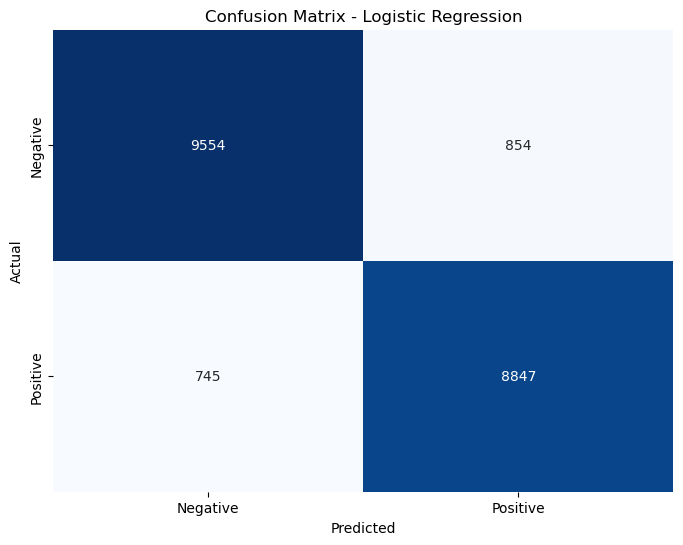

In [ ]:
# Matrice de confusion pour la régression logistique
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logistic, annot=True, cmap="Blues", fmt='d', cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [ ]:
# prediction avec le modèle modèle Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf,y_train)
y_pred_nb_model = nb_model.predict(X_test_tfidf)
accuracy_nb_model = accuracy_score(y_test, y_pred_nb_model)
print("Précision du modèle Naive Bayes:", accuracy_nb_model)


Précision du modèle Naive Bayes: 0.893


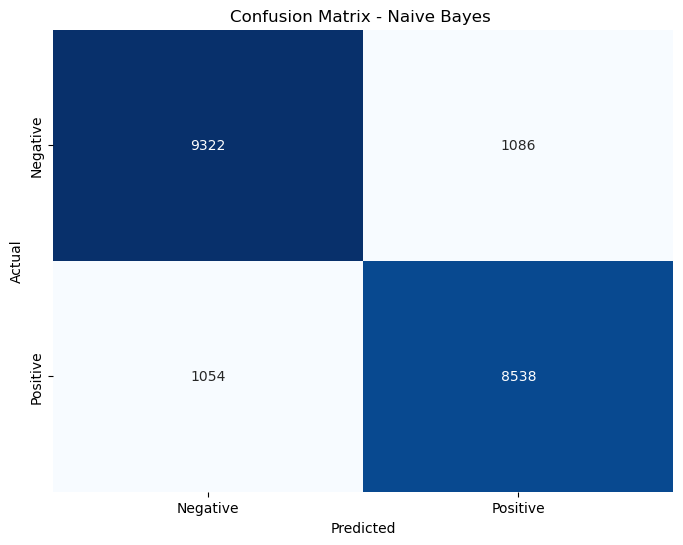

In [ ]:
# Matrice de confusion pour le modèle Naives Bayes
conf_matrix_nb_model = confusion_matrix(y_test, y_pred_nb_model)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb_model, annot=True, cmap="Blues", fmt='d', cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes ')
plt.show()

In [ ]:
# Encodez les textes en utilisant un modèle word2vec préentraîné pour la langue française.

In [10]:
import numpy as np
from gensim.models import KeyedVectors
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Embedding, Dense
from sklearn.model_selection import train_test_split


In [11]:
# Charger le modèle Word2Vec préentraîné
path_to_model = '/content/drive/MyDrive/ml2/modelwor2vec.bin'
word2vec_model = KeyedVectors.load_word2vec_format(path_to_model, binary=True)

In [12]:
# Fonction pour encoder les textes en utilisant Word2Vec
def encode_text(text):
    words = text.split()
    word_vectors = []
    for word in words:
        if word in word2vec_model:
            word_vector = word2vec_model[word]
            word_vectors.append(word_vector)
    if not word_vectors:
        return np.zeros(word2vec_model.vector_size)
    text_vector = np.mean(word_vectors, axis=0)
    return text_vector

In [13]:
# transformation des donnees

data_train2 = pd.DataFrame(dataset['train'])
data_test2 = pd.DataFrame(dataset['test'])
data_validation2 = pd.DataFrame(dataset['validation'])



In [14]:
# Application de la fonction traitement au jeu de données
data_train2['review']=data_train2['review'].apply(traitement)
data_test2['review']=data_test2['review'].apply(traitement)
data_validation2['review']=data_validation2['review'].apply(traitement)

<ipython-input-9-6c0cea2a0106>:9: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "lxml").get_text()
<ipython-input-9-6c0cea2a0106>:9: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "lxml").get_text()
<ipython-input-9-6c0cea2a0106>:9: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "lxml").get_text()


In [15]:
# fonction de Tokenisation

def tokenize_french(text):
    return nltk.word_tokenize(text, language='french')

In [16]:
#Appliquer la fonction de tokenization
data_train2['review_str'] = data_train2['review'].apply(lambda x: ' '.join(x))
data_test2['review_str'] = data_test2['review'].apply(lambda x: ' '.join(x))
data_validation2['review_str'] = data_validation2['review'].apply(lambda x: ' '.join(x))


data_train2['review_str'] = data_train2['review_str'].apply(tokenize_french)
data_test2['review_str'] = data_test2['review_str'].apply(tokenize_french)
data_validation2['review_str'] = data_validation2['review_str'].apply(tokenize_french)


In [17]:
# VECTORISATTION
data_train2['review_str'] = data_train2['review'].apply(lambda x: ' '.join(x))
data_test2['review_str'] = data_test2['review'].apply(lambda x: ' '.join(x))
data_validation2['review_str'] = data_validation2['review'].apply(lambda x: ' '.join(x))


X_train_encoded = data_train2['review_str'].apply(encode_text)
X_test_encoded = data_test2['review_str'].apply(encode_text)
X_validation_encoded = data_validation2['review_str'].apply(encode_text)

In [18]:
# Convertir les données d'entrée en tableaux NumPy
X_train_encoded = np.array(X_train_encoded.tolist())
X_validation_encoded = np.array(X_validation_encoded.tolist())
X_test_encoded = np.array(X_test_encoded.tolist())

In [19]:
print(X_train_encoded)

[[-0.00318143 -0.08129501 -0.01143181 ... -0.05889715 -0.01560774
  -0.07763553]
 [ 0.00762507 -0.06431224 -0.0035013  ... -0.03428158 -0.02792585
  -0.08367809]
 [ 0.01445874 -0.08076664  0.01185678 ... -0.02471395 -0.06818399
  -0.05004505]
 ...
 [ 0.01161682 -0.07611593 -0.0413346  ... -0.03338553 -0.01832575
  -0.08996502]
 [-0.00856404 -0.05669836  0.02336063 ... -0.02165147 -0.00352734
  -0.07850521]
 [-0.01850901 -0.05851205 -0.0017158  ... -0.05391064 -0.03140507
  -0.09042908]]


In [20]:
print(X_test_encoded)

[[-0.02724159 -0.01680535  0.0060448  ... -0.05870897 -0.08578762
  -0.10817663]
 [-0.01523456 -0.07101955  0.00452893 ... -0.05120022 -0.00043213
  -0.06698828]
 [ 0.03126489 -0.11122235  0.03546201 ... -0.02862743 -0.05111768
  -0.06540668]
 ...
 [ 0.00234205 -0.07911177 -0.0016616  ... -0.05607707 -0.01795053
  -0.05470917]
 [ 0.01377915 -0.09989228 -0.04110982 ... -0.06574311 -0.01162453
  -0.09861323]
 [-0.00839532 -0.07459555 -0.01218404 ... -0.03997323 -0.00882533
  -0.08458564]]


In [ ]:
# Utilisation du LSTM

In [30]:
from tensorflow.keras.layers import Dropout


# # Création du modèle LSTM
model = Sequential([
    Embedding(input_dim=len(word2vec_model.index_to_key) + 1, output_dim=200, input_length=X_train_encoded.shape[1]),
    LSTM(units=64, return_sequences=True),
    LSTM(units=32),
    Dense(units=64, activation='relu'),
    Dropout(0.5),
    Dense(units=1, activation='sigmoid')
    ])


In [31]:
# Compiler le modèle
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [33]:
# Entraîner le modèle
history_model=model.fit(X_train_encoded, y_train, batch_size=64, epochs=20, validation_data=(X_validation_encoded, y_validation))

# Évaluer le modèle
loss, accuracy = model.evaluate(X_test_encoded, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

Epoch 1/20
2500/2500 [==============================] - 61s 24ms/step - loss: 0.6931 - accuracy: 0.5033 - val_loss: 0.6933 - val_accuracy: 0.4898
Epoch 2/20
2500/2500 [==============================] - 60s 24ms/step - loss: 0.6931 - accuracy: 0.5033 - val_loss: 0.6933 - val_accuracy: 0.4898
Epoch 3/20
2500/2500 [==============================] - 61s 24ms/step - loss: 0.6931 - accuracy: 0.5033 - val_loss: 0.6934 - val_accuracy: 0.4898
Epoch 4/20
2500/2500 [==============================] - 59s 24ms/step - loss: 0.6931 - accuracy: 0.5029 - val_loss: 0.6934 - val_accuracy: 0.4898
Epoch 5/20
2500/2500 [==============================] - 60s 24ms/step - loss: 0.6931 - accuracy: 0.5037 - val_loss: 0.6933 - val_accuracy: 0.4898
Epoch 6/20
2500/2500 [==============================] - 61s 24ms/step - loss: 0.6931 - accuracy: 0.5028 - val_loss: 0.6932 - val_accuracy: 0.4898
Epoch 7/20
2500/2500 [==============================] - 60s 24ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 -

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Fonction pour tracer la matrice de confusion
def plot_confusion_matrix(model, X_test, y_test):
    # Prédictions sur les données de test
    y_test1= y_test.copy()
    y_pred = np.argmax(model.predict(X_test_encoded), axis=-1)
    #y_test1 = np.argmax((y_test1),axis=-1)
    # Calcul de la matrice de confusion
    cm = confusion_matrix(y_test1, y_pred)

    # Affichage de la matrice de confusion sous forme de heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

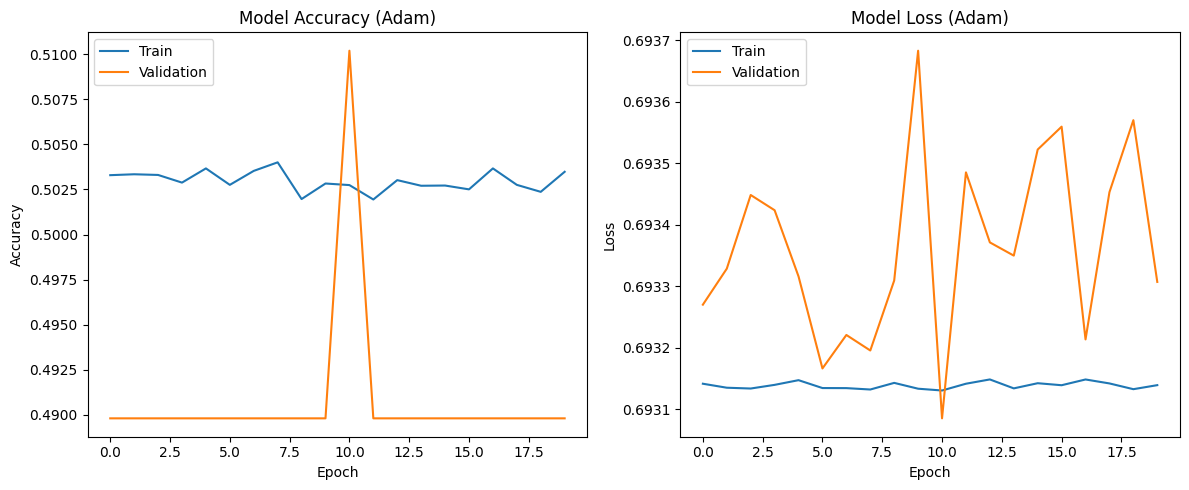

In [36]:
 # COURBE D'apprentissage

import matplotlib.pyplot as plt

# Create subplots for accuracy and loss
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values (Adam)
plt.subplot(1, 2, 1)
plt.plot(history_model.history['accuracy'])
plt.plot(history_model.history['val_accuracy'])
plt.title('Model Accuracy (Adam)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values (Adam)
plt.subplot(1, 2, 2)
plt.plot(history_model.history['loss'])
plt.plot(history_model.history['val_loss'])
plt.title('Model Loss (Adam)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


625/625 [==============================] - 4s 7ms/step


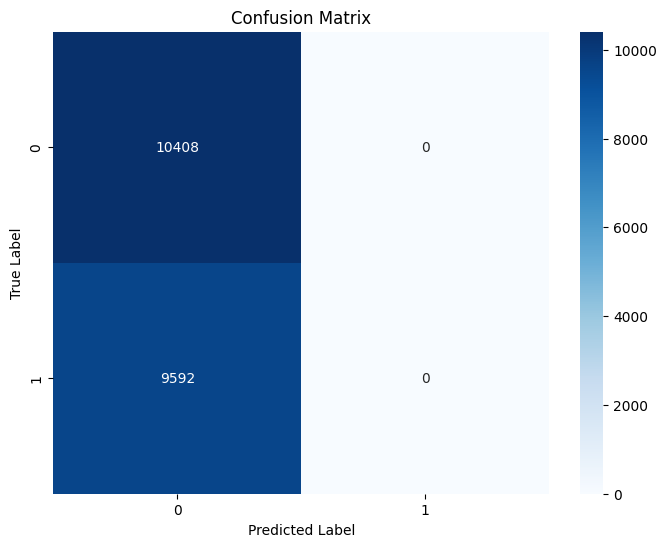

In [37]:
plot_confusion_matrix(model,X_test_encoded,y_test)

In [ ]:
# utilisation de l'aptimizer adagrad

In [ ]:
from tensorflow.keras.optimizers import Adagrad

In [44]:
from tensorflow.keras.layers import Dropout


# # Création du modèle LSTM
model2 = Sequential([
    Embedding(input_dim=len(word2vec_model.index_to_key) + 1, output_dim=200, input_length=X_train_encoded.shape[1]),
    LSTM(units=64, return_sequences=True),
    LSTM(units=32),
    Dense(units=64, activation='relu'),
    Dropout(0.5),
    Dense(units=1, activation='sigmoid')
    ])


In [45]:
# Compiler le modèle
model2.compile(loss='binary_crossentropy', optimizer='adagrad', metrics=['accuracy'])

In [46]:
# Entraîner le modèle
history_model2=model2.fit(X_train_encoded, y_train, batch_size=64, epochs=10, validation_data=(X_validation_encoded, y_validation))

# Évaluer le modèle
loss, accuracy = model2.evaluate(X_test_encoded, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

Epoch 1/10
2500/2500 [==============================] - 53s 19ms/step - loss: 0.6932 - accuracy: 0.5009 - val_loss: 0.6932 - val_accuracy: 0.4898
Epoch 2/10
2500/2500 [==============================] - 48s 19ms/step - loss: 0.6931 - accuracy: 0.5020 - val_loss: 0.6933 - val_accuracy: 0.4898
Epoch 3/10
2500/2500 [==============================] - 47s 19ms/step - loss: 0.6931 - accuracy: 0.5037 - val_loss: 0.6933 - val_accuracy: 0.4898
Epoch 4/10
2500/2500 [==============================] - 47s 19ms/step - loss: 0.6931 - accuracy: 0.5033 - val_loss: 0.6933 - val_accuracy: 0.4898
Epoch 5/10
2500/2500 [==============================] - 49s 19ms/step - loss: 0.6931 - accuracy: 0.5040 - val_loss: 0.6933 - val_accuracy: 0.4898
Epoch 6/10
2500/2500 [==============================] - 48s 19ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6933 - val_accuracy: 0.4898
Epoch 7/10
2500/2500 [==============================] - 48s 19ms/step - loss: 0.6931 - accuracy: 0.5031 - val_loss: 0.6933 -

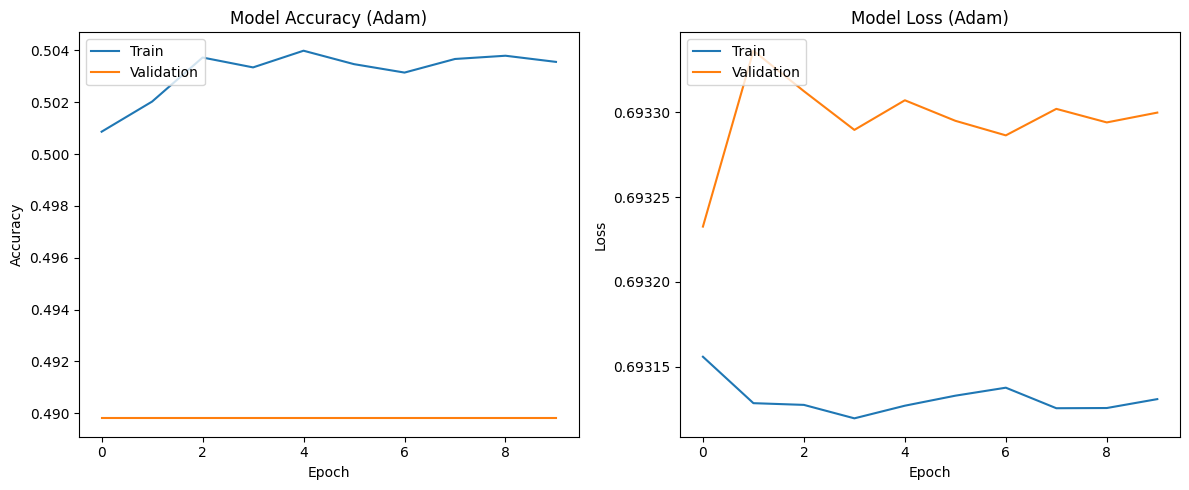

In [47]:
 # COURBE D'apprentissage

import matplotlib.pyplot as plt

# Create subplots for accuracy and loss
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values (Adam)
plt.subplot(1, 2, 1)
plt.plot(history_model2.history['accuracy'])
plt.plot(history_model2.history['val_accuracy'])
plt.title('Model Accuracy (Adam)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values (Adam)
plt.subplot(1, 2, 2)
plt.plot(history_model2.history['loss'])
plt.plot(history_model2.history['val_loss'])
plt.title('Model Loss (Adam)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


625/625 [==============================] - 6s 8ms/step


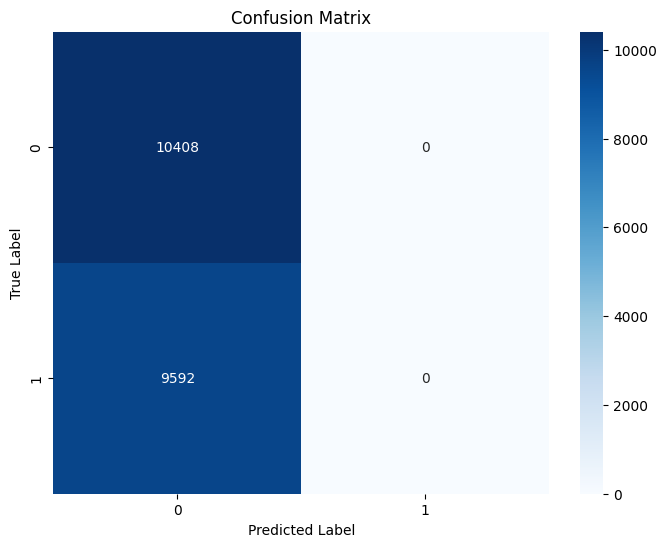

In [48]:
plot_confusion_matrix(model2,X_test_encoded,y_test)